In [7]:
#import nltk
import os
import pandas as pd
from nltk import ngrams, FreqDist

In [8]:
corpus_folder = 'corpora'
corpus_files = sorted(os.listdir(corpus_folder))
print(corpus_files)

['entertainment_anime.txt', 'lifestyle_food.txt', 'news_conservative.txt']


In [9]:
def tokenise(corpus):
    """Really dumb tokeniser. Splits to sentences and then to words. """
    sentences = []
    for sentence in corpus.split('\n'):
        sentence = sentence.strip()
        if len(sentence) > 0:
            sentences.append([x.strip() for x in sentence.split(' ') if len(x) > 0])
    return sentences

def get_unigrams(corpus):
    unigrams = {}
    for sentence in corpus:
        for word in sentence:
            word = word.lower().strip(' \"\'')
            if len(word) > 0:
                if word not in unigrams:
                    unigrams[word] = 0
                unigrams[word] += 1
    return unigrams

def get_ngrams(corpus):
    ngrms = {}
    for sentence in corpus:
        ngs = ngrams(sentence, 3)
        for ng in ngs:
            if ng not in ngrms:
                ngrms[ng] = 0
            ngrms[ng] += 1
    return ngrms

def sort_dict(d, reverse = True):
    return sorted(d.items(), key = lambda x : x[1], reverse = reverse)

In [10]:
corpora = {f : tokenise(open(corpus_folder+'/'+f).read()) for f in corpus_files}
all_unigrams = {cls : get_unigrams(corpus) for cls, corpus in corpora.items()}

#all_unigrams = {cls : get_ngrams(corpus) for cls, corpus in corpora.items()}
# print("Class/Genre Tokens Types")
# for cls, corpus in corpora.items():
#     print(cls, len(corpus), len(all_unigrams[cls]))

all_unigrams = pd.DataFrame(all_unigrams)
all_unigrams

,entertainment_anime.txt,lifestyle_food.txt,news_conservative.txt
0,1097.0,1.0,1.0
00,150.0,NaN,NaN
0079,450.0,NaN,NaN
0080,100.0,NaN,NaN
00cst,50.0,NaN,NaN
01,NaN,NaN,57.0
02,50.0,NaN,NaN
03x0bu2w9hi,50.0,NaN,NaN
08th,100.0,NaN,NaN
09,50.0,NaN,NaN


In [11]:
all_unigrams = all_unigrams.fillna(0.0) # I am not Smoothing.
sum_counts = all_unigrams.sum(axis = 1).sort_values(ascending = False)
sum_counts

the                                                                        225789.0
i                                                                          139113.0
a                                                                          119546.0
and                                                                        118287.0
to                                                                         116847.0
of                                                                         100630.0
it                                                                          82551.0
is                                                                          77876.0
that                                                                        70189.0
in                                                                          65880.0
s                                                                           63948.0
this                                                                        

In [12]:
all_unigrams = all_unigrams.reindex(sum_counts.index)
all_unigrams

,entertainment_anime.txt,lifestyle_food.txt,news_conservative.txt
the,160731.0,19110.0,45948.0
i,107063.0,16101.0,15949.0
a,80651.0,14778.0,24117.0
and,82454.0,12148.0,23685.0
to,81803.0,9536.0,25508.0
of,70139.0,8361.0,22130.0
it,58886.0,10868.0,12797.0
is,53426.0,6590.0,17860.0
that,46707.0,7211.0,16271.0
in,44984.0,7362.0,13534.0


In [ ]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(theme='space')

In [ ]:
all_unigrams[:2000].iplot()


In [ ]:
print(all_unigrams.sum())

In [ ]:
# Laplace Smoothing
all_unigrams = all_unigrams + 1
all_unigrams.sum()

In [83]:
# Convert to Probabilites
all_unigrams_probs = all_unigrams/all_unigrams.sum()
all_unigrams_probs

,entertainment_anime.txt,lifestyle_food.txt,news_conservative.txt
the,4.124081e-02,0.034227,4.484164e-02
i,2.747061e-02,0.028838,1.556561e-02
a,2.069379e-02,0.026468,2.353676e-02
and,2.115640e-02,0.021758,2.311517e-02
to,2.098937e-02,0.017080,2.489424e-02
of,1.799660e-02,0.014976,2.159765e-02
it,1.510930e-02,0.019466,1.248957e-02
is,1.370836e-02,0.011804,1.743055e-02
that,1.198439e-02,0.012916,1.587985e-02
in,1.154230e-02,0.013187,1.320881e-02


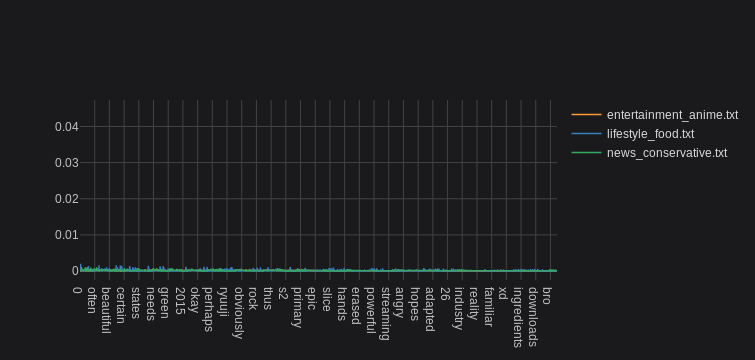

In [84]:
all_unigrams_probs[:2000].iplot()

In [85]:
import math
all_unigrams_log = all_unigrams_probs.applymap(math.log)

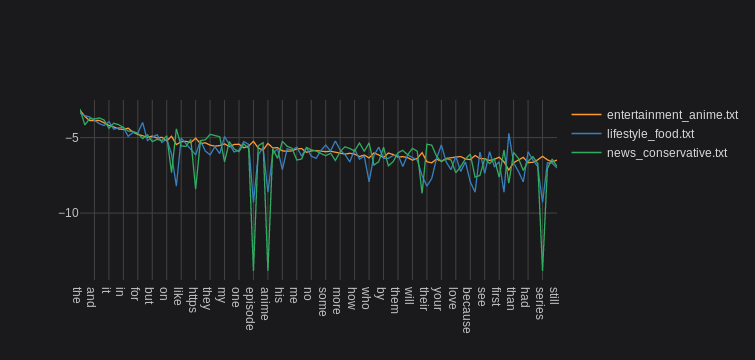

In [86]:
all_unigrams_log[:100].iplot()

In [89]:
def sentence_prob(sentence):
    wordprobs = all_unigrams_log.loc[sentence] 
    #print(wordprobs)
    return wordprobs.sum()


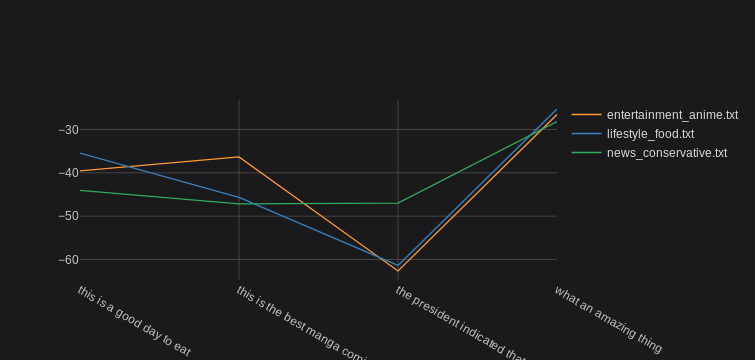

In [91]:
sentences = ["this is a good day to eat", "this is the best manga comic","the president indicated that the economy was good", "what an amazing thing"]
sprobs = pd.DataFrame({sentence : sentence_prob(sentence.split(' ')) for sentence in sentences})
sprobs.transpose().iplot()

## We have
$$ P(word\,|\,class) = \frac{c(word\,in\,class)}{c(all\,words\,in\,that\,class)}$$
## What we need
$$ P(class\,|\,word) $$
$$ \rightarrow \frac{P(word\,|\,class) * P(class)}{P(word)} $$
## How to choose a class ?
$$class = argmax_i\,P(class_i\,|\,word)$$
$$ \rightarrow argmax_i \, \frac{P(word\,|\,class_i) * P(class_i)}{P(word)} $$
$$ \rightarrow argmax_i \, P(word\,|\,class_i) * P(class_i) $$

In [92]:
cprobs = all_unigrams.sum()
cprobs = cprobs / cprobs.sum()
cprobs = cprobs.apply(math.log)

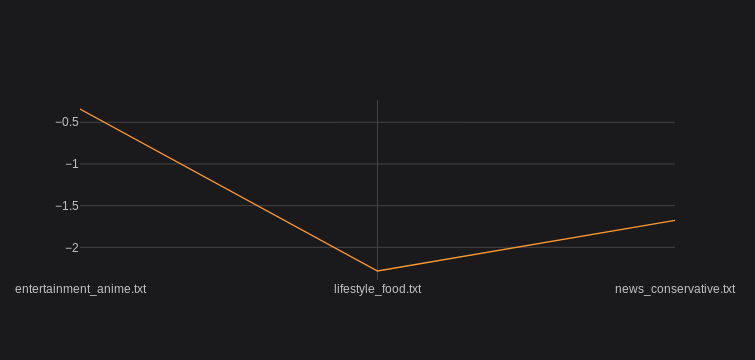

In [93]:
cprobs.iplot()

#### Skew in the Classes
* What if one class/genre has the biggest corpus ?.
* How to manage this skew ?

In [94]:
def nbestimate(sentence):
    probs = all_unigrams_log.loc[sentence].sum()
    probs = probs + cprobs
    return probs


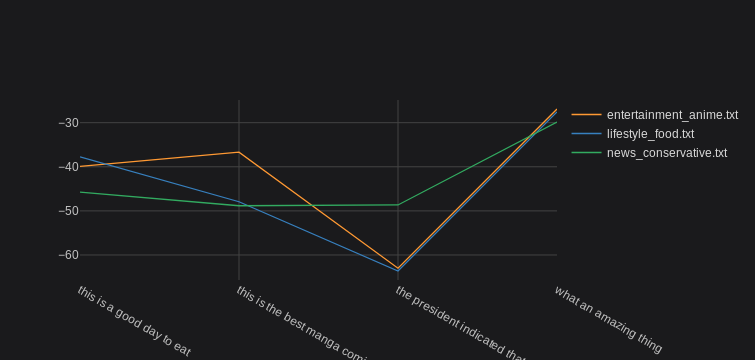

In [95]:
sprobs = pd.DataFrame({sentence : nbestimate(sentence.split(' ')) for sentence in sentences})
sprobs.transpose().iplot()

### Generative : A Class of Models 
* $P(Class\,|\,Data)$ is estimated by figuring out $P(Data\,|\,Class)$
* The model tries to ask, What is the chance that, I have seen this data if it came from this particular class ?.
* The model therefore, **generates** data, or more accurately, generates its estimate of the data. So, its a

entertainment_anime.txt ['there', 'are', 'a', 'shit', 'ton', 'of', 'koutarous', 'but', 'the', 'presence', 'of', 'one', 'https', 'smediacacheak0pinimgcomoriginals1219ed1219ed717fc2bfce372759bba2fe1cfegif', 'is', 'enough', 'to', 'make', 'it', 'the', 'most', 'interesting', 'party']
                                  0
entertainment_anime.txt -146.219649
lifestyle_food.txt      -159.376921
news_conservative.txt   -157.854752


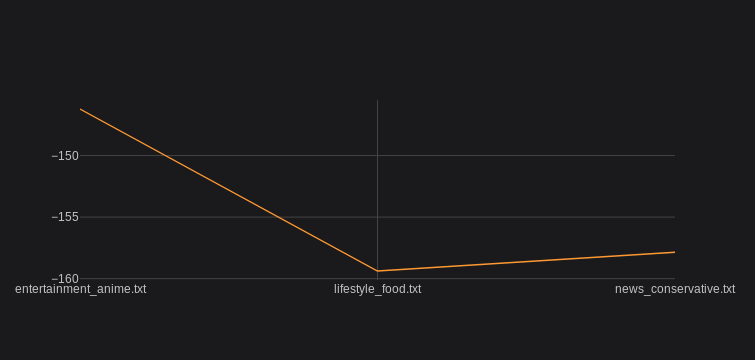

lifestyle_food.txt ['gt', 'the', 'spices', 'what', 'spices', 'we', 'must', 'know']
                                 0
entertainment_anime.txt -67.408618
lifestyle_food.txt      -57.167774
news_conservative.txt   -64.073100


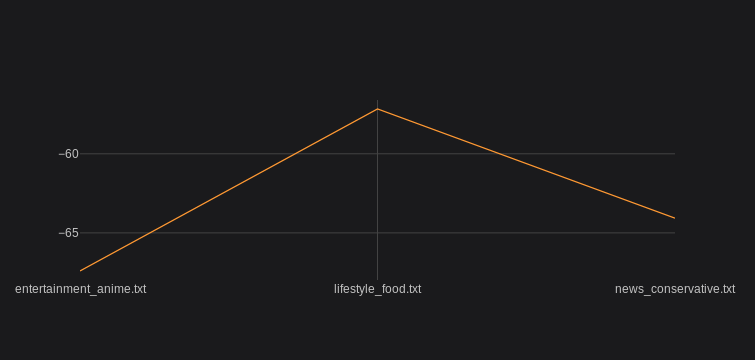

news_conservative.txt ['because', 'he', 'left', 'the', 'plantation']
                                 0
entertainment_anime.txt -38.750924
lifestyle_food.txt      -48.269161
news_conservative.txt   -29.888552


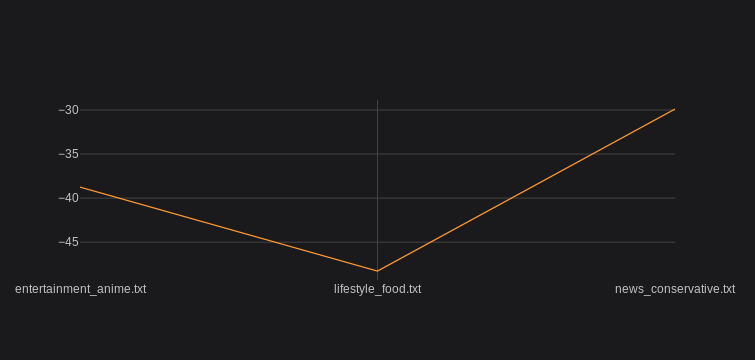

In [96]:
import random
for cls, sentences in corpora.items():
    clen = len(corpora[cls])
    rsentence = corpora[cls][random.randrange(clen)]
    print(cls, rsentence)
    nbprobs = pd.DataFrame(nbestimate(rsentence))
    print(nbprobs)
    nbprobs.iplot()
#     nprobs[auth] = nbprobs
#     iplot([ 
#         Scatter({"x" : list(zip(*nbprobs))[0], "y": list(zip(*nbprobs))[1]}, name=auth) 
#     ])
# iplot([ 
#     Bar({"x" : list(zip(*D))[0], "y": list(zip(*D))[1]}, name=auth) for auth, D in nprobs.items()
# ])

In [97]:
import numpy
def generate(cls, length = 10):
    probs = all_unigrams_probs[cls]
    words = numpy.random.multinomial(length, probs.values)
    return list(all_unigrams_probs.loc[words > 0].index)

In [98]:
wordbags = {cls  : generate(cls) for cls in all_unigrams.columns}
wordbags


{'entertainment_anime.txt': ['the',
  'to',
  'is',
  'more',
  'only',
  'know',
  'joining',
  'ancient',
  'clones',
  'generally'],
 'lifestyle_food.txt': ['the',
  'know',
  'best',
  'both',
  'single',
  'fails',
  'thumbnail',
  'ruining'],
 'news_conservative.txt': ['he',
  'from',
  'can',
  'even',
  'end',
  'win',
  'federal',
  'spin',
  'collectivism',
  'upvoted']}

### What next ?
* This is all based on unigrams. Can we extend this to N-Grams ?
* Better Smoothing then, and Backoff.
* Apply this to GCD/GCE